<a href="https://colab.research.google.com/github/pranav98711/Google-Colaboratory/blob/master/DeepLearning/MyProjects/Part3_Deep_Neural_Network_for_Image_Classification/Deep_Neural_Network_for_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import time
import matplotlib.pyplot as plt
import numpy as np
import scipy
import h5py
from PIL import Image
from scipy import ndimage
from sample_data.dnn_app_utils_v3 import *


%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [0]:
train_x_orig,train_y,test_x_orig,test_y,classes = load_data()

y =0. It's a non-cat picture


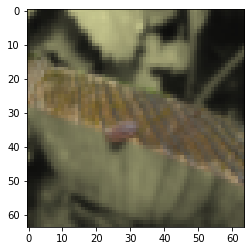

In [3]:
index=12
plt.imshow(train_x_orig[index])
print("y =" + str(train_y[0,index]) +  ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture" )

In [0]:
m_train=train_x_orig.shape[0]
m_test=test_x_orig.shape[0]
num_px=train_x_orig[1]

In [0]:
train_x_flatten  = train_x_orig.reshape(( train_x_orig.shape[0],-1 )).T
test_x_flatten  = test_x_orig.reshape( (test_x_orig.shape[0],-1 )).T

train_x   = train_x_flatten/255.
test_x  = test_x_flatten/255.

Architecting Model

2 layer NN

In [0]:
n_x = 12288
n_h=7
n_y=1
layers_dims=(n_x,n_h,n_y)



In [0]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
  np.random.seed(1)
  grads={}
  costs=[]
  m=X.shape[1]
  (n_x,n_h,n_y) = layers_dims


  parameters=initialize_parameters(n_x, n_h, n_y)
  W1=parameters["W1"]
  b1=parameters["b1"]
  W2=parameters["W2"]
  b2=parameters["b2"]

  for i in range(0,num_iterations):
    A1,cache1=linear_activation_forward(X, W1, b1, activation="relu")
    A2,cache2=linear_activation_forward(A1, W2, b2, activation="sigmoid")

    cost = compute_cost(A2, Y)

    dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))

    dA1,dW2,db2= linear_activation_backward(dA2, cache2, activation="sigmoid")
    dA0,dW1,db1= linear_activation_backward(dA1, cache1, activation="relu")

    grads["dW1"] = dW1
    grads["dW2"] = dW2
    grads["db1"] = db1
    grads["db2"] = db2

    parameters = update_parameters(parameters, grads, learning_rate)

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    if print_cost and i%100==0:
      print("Cost after iteration {}: {}".format(i , np.squeeze(cost)))
      costs.append(cost)

  plt.plot(np.squeeze(costs))
  plt.ylabel('cost')
  plt.xlabel('iterations (per hundreds)')
  plt.title("Learning rate =" + str(learning_rate))
  plt.show()
    
  return parameters

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912678
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605748
Cost after iteration 500: 0.5158304772764731
Cost after iteration 600: 0.47549013139433255
Cost after iteration 700: 0.43391631512257495
Cost after iteration 800: 0.4007977536203886
Cost after iteration 900: 0.35807050113237976
Cost after iteration 1000: 0.3394281538366413
Cost after iteration 1100: 0.30527536361962654
Cost after iteration 1200: 0.2749137728213016
Cost after iteration 1300: 0.2468176821061484
Cost after iteration 1400: 0.19850735037466105
Cost after iteration 1500: 0.17448318112556638
Cost after iteration 1600: 0.17080762978096967
Cost after iteration 1700: 0.11306524562164705
Cost after iteration 1800: 0.09629426845937154
Cost after iteration 1900: 0.08342617959726867
Cost after iteration 2000: 0.07439078704319087
Cost after iteration 2100: 0.0663074

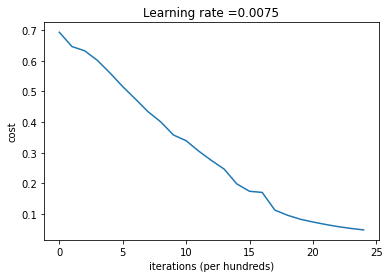

In [8]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [9]:
prediction_train=predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [10]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.72


In [0]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [0]:
def L_layer_model(X,Y,layers_dims,learning_rate=0.0075,num_iterations=3000,print_cost=False):
  np.random.seed(1)
  costs=[]

  parameters=initialize_parameters_deep(layers_dims)

  for i in range(0,num_iterations):
    AL,caches=L_model_forward(X, parameters)

    cost=compute_cost(AL, Y)

    grads=L_model_backward(AL, Y, caches)

    parameters=update_parameters(parameters, grads, learning_rate)

    if print_cost and i%100==0:
      print("Cost after iteration %i: %f" %(i,cost))
      costs.append(cost)

  plt.plot(np.squeeze(costs))
  plt.ylabel('cost')
  plt.xlabel('iterations (per hundreds)')
  plt.title("Learning rate =" + str(learning_rate))
  plt.show()
    
  return parameters

    


Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


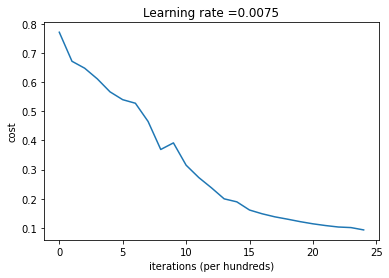

In [13]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [14]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9856459330143539


In [15]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.8


Accuracy: 0.0
y = 0.0, your L-layer model predicts a "non-cat" picture.


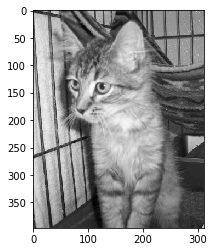

In [50]:
import imageio
import skimage.transform
## START CODE HERE ##
my_image = "/content/2.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)
## END CODE HERE ##

fname =  my_image
m=imageio.imread(fname, as_gray=True)
# OR m=cv2.imread(fname,cv2.IMREAD_GRAYSCALE)
# If as gray_scale=False i.e colour image, it gives error
image = np.array(m)
my_image = skimage.transform.resize(image, ((len(num_px)*len(num_px)*3 , 1)))
#print(my_image.shape)
my_image = my_image/255.
my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

QA --- I uploaded my image as well and they're all cat pictures but my model predict none of them correctly.

Ans--- This is normal. As you will see in the next specialization courses, more specifically on the Structuring Machine Learning Projects course, the dev set and test set must come from the same distribution and the training set is suppose to not deviate so much from them. When you upload an image, the test image, if it deviates very much the training set by resolutions and other factors, this will impact the algorithm. You will learn some approaches to mitigate this.

(source - https://www.coursera.org/learn/neural-networks-deep-learning/discussions/all/threads/1m5tp_TSEeehOg4TMR5MNA)